
#  Multinomial Logistic Regression

$\mathbf{Multinomial}$ $\mathbf{logistic}$ $\mathbf{regression}$ is a statistical method used for classification problems where the outcome can take on more than two categories. It's an extension of binary logistic regression. 

`````{admonition} Goal
:class: tip
The goal is to model the probabilities of the different possible outcomes of a categorically distributed dependent variable, given a set of independent variables.
`````

```{admonition} Case Study: Real-world Application
:class: note
This model is a powerful statistical method used in various real-world scenarios where the outcome variable can take more than two categories. This versatility makes it an invaluable tool across multiple disciplines. We will explore a case study to illustrate its practical application. There are some case studies: 

::::{grid}
:gutter: 3

:::{grid-item-card} Case Study 1
Diagnosing Medical Conditions
:::

:::{grid-item-card} Case Study 2
Customer Segmentation And Targeting
:::

:::{grid-item-card} Case study 3
Credit Risk Assessment
:::
::::
```

In each of these scenarios, the outcome is multiple categories, and multinomial logistic regression can be used to predict the probability of each category.


```{image} MLR.png
:alt: mlr
:class: bg-primary mb-1
:width: 300px
:align: center
```

Let's imagine a data set $\mathcal{D}$, where each element consists of a pair of feature vectors $\boldsymbol{x}_i$ and a class label $\boldsymbol{y}_i$:

$$
\mathcal{D} = \{(\boldsymbol{x}_i, y_i)\}_{i=1}^n \quad \text{where } \boldsymbol{x}_i \in \mathbb{R}^d \text{ and } y_i \in \mathcal{Y}.
$$

Here $\mathcal{Y}$ is the set of possible categories, which in this case is three, that is more than two.

Multinomial logistic regression predicts the probability of membership in each category, so the predicted probability vector $\boldsymbol{\hat{y}}$ is defined as:

$$
\boldsymbol{\hat{y}} = (p_1, \ldots, p_K), \quad \text{where } p_k > 0 \text{ and } \sum_{k=1}^K p_k = 1.
$$

The logits $\boldsymbol{z}$ are calculated as a linear combination of the input features $\boldsymbol{x}$ and the weights $\boldsymbol{w}_k$ for each class, and the predicted probability vector $\boldsymbol{\hat{y}}$ is obtained through the softmax function:

$$
z_k = \boldsymbol{x}^\top \boldsymbol{w}_k, \quad \boldsymbol{\hat{y}} = \text{Softmax}(\boldsymbol{z}) = \left( \frac{e^{z_1}}{\sum_{k=1}^K e^{z_k}}, \ldots , \frac{e^{z_K}}{\sum_{k=1}^K e^{z_k}} \right)
$$

The predicted class is given by the argument that maximizes the probabilities:

$$
\text{Predicted class} = \arg\max_{1 \leq k \leq K} p_k
$$

The weight matrix $\boldsymbol{W}$ is defined as:

$$
\boldsymbol{W} = [\boldsymbol{w}_1 \ldots \boldsymbol{w}_K]
$$


In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from jupyterquiz import display_quiz
display_quiz("quizzes/intro.json")

<IPython.core.display.Javascript object>

````{admonition} Question
:class: important
Implement the softmax function and apply it to a sample score vector to compute class probabilities.

Given a matrix of scores (logits) $\mathbf{Z}$, where each row corresponds to a different sample and each column corresponds to a score for a class, implement the softmax function to convert these scores into probabilities.

The softmax function for a score vector $\mathbf{z}$ is defined as:

$$
\text{Softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$

where $i$ denotes the $i$-th element of the vector, and $K$ is the total number of classes.

1. Write a function to compute the softmax for a single score vector $\mathbf{z}$.
2. Extend this function to handle a matrix of scores $\mathbf{Z}$, applying the softmax function to each row.
3. Normalize each row of $\mathbf{Z}$ so that each element represents the probability of the corresponding class, with all probabilities in a row summing to 1.
4. Test your function with the following score matrix $\mathbf{Z}$:

$$
\mathbf{Z} = 
\begin{bmatrix}
2 & 1 & 0 \\
1 & 2 & 3 \\
1 & 0 & 1 \\
\end{bmatrix}
$$

Compute the softmax of each row and provide the resulting probability matrix $\hat{\mathbf{Y}}$.


```{admonition} Answer
:class: tip, dropdown
$$
\mathbf{{Y}} = 
\begin{bmatrix}
0.6652 & 0.2447 & 0.0900 \\
0.0900 & 0.2447 & 0.6652 \\
0.4223 & 0.1554 & 0.4223 \\
\end{bmatrix}
$$
```
````

### Example: MNIST

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'

X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

X = X.astype(float).values / 255
Y = Y.astype(int).values

Splitting into train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [17]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 973, 1151,  993, 1034,  958,  921,  967, 1010, 1008,  985]))

Fitting and evaluation

In [18]:
%%time
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.92
CPU times: user 7min 31s, sys: 25 s, total: 7min 56s
Wall time: 2min 3s


Confusion matrix


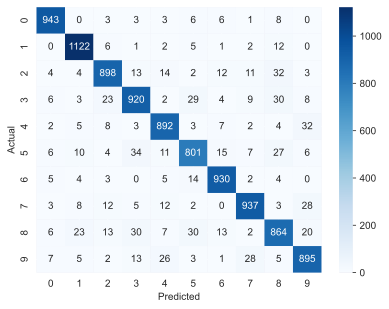

In [19]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred, model.classes_)

Sample Digit Visualization

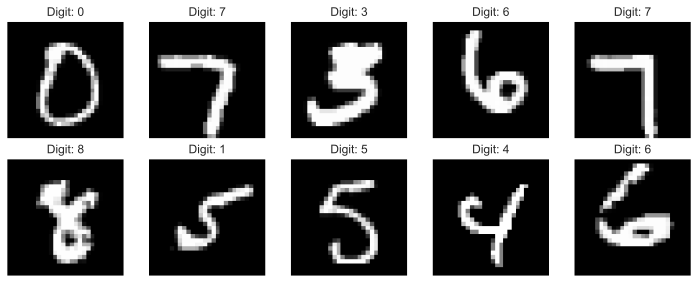

In [20]:
def plot_digits(samples, labels, n_rows=2, n_cols=5):
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(samples[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_digits(X_test[:10], y_pred[:10])

In [21]:
from jupyterquiz import display_quiz
display_quiz("quizzes/math.json")

<IPython.core.display.Javascript object>

# Example: Iris dataset

Model Building

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import plotly.express as px
import pandas as pd

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # All features from the Iris dataset
y = iris.target  # Target values (species of Iris)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
# For visualization, select two features. 
# These indices can be changed to select different features
feature_x_index = 0  # Index for the first feature used for plotting
feature_y_index = 1  # Index for the second feature used for plotting

# Create a meshgrid for plotting decision boundaries
# Adjust the limits based on the selected features for visualization
x_min, x_max = X[:, feature_x_index].min() - .5, X[:, feature_x_index].max() + .5
y_min, y_max = X[:, feature_y_index].min() - .5, X[:, feature_y_index].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the classifiers to be used
classifiers = {
    'L1 logistic (Multinomial)': LogisticRegression(C=10, penalty='l1',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000, 
                                                    random_state=42),  # Regularization strength, penalty, solver, class type, and maximum iterations for convergence
    'L2 logistic (Multinomial)': LogisticRegression(C=10, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000, 
                                                    random_state=42),
    'L3 logistic (OvR)': LogisticRegression(C=10, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000, 
                                            random_state=42),  # 'ovr' stands for One-vs-Rest
}


Model Evaluation

Accuracy (train) for L1 logistic (Multinomial): 98.0%
Accuracy (train) for L2 logistic (Multinomial): 98.0%
Accuracy (train) for L3 logistic (OvR): 98.0%


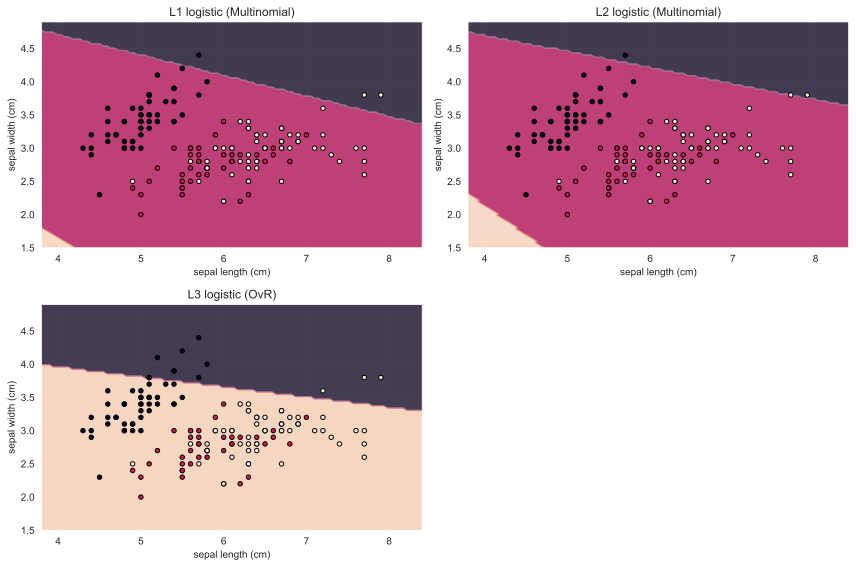

In [24]:
plt.figure(figsize=(12, 8))

# Iterate over each classifier for training and evaluation
for index, (name, classifier) in enumerate(classifiers.items()):
    # Train each classifier using the full feature set
    classifier.fit(X, y)

    # Predict using the trained classifier
    y_pred = classifier.predict(X)

    # Calculate and print the accuracy of the classifier
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for {}: {:.1f}%".format(name, accuracy * 100))

    # Plotting decision regions for visualization
    # Use mean values for the non-plotted features
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), 
                                 np.repeat(iris.data[:, 2].mean(), xx.ravel().size), 
                                 np.repeat(iris.data[:, 3].mean(), xx.ravel().size)])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, index + 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, feature_x_index], X[:, feature_y_index], c=y, edgecolor='k', s=20)
    plt.title(name)
    plt.xlabel(iris.feature_names[feature_x_index])
    plt.ylabel(iris.feature_names[feature_y_index])

plt.tight_layout()
plt.show()


```{note}
The plot appears to show decision boundary plots from three logistic regression models trained on the Iris dataset, using two features (sepal length and sepal width):

L1 Logistic (Multinomial): The decision boundary for L1 regularized logistic regression is block-like. This is due to the nature of L1 regularization, which encourages sparsity in the model's parameters. In practice, this means that the model will tend to use fewer features, leading to some features having zero weights. This can result in more abrupt changes in the decision boundary, as seen in the plot.

L2 Logistic (Multinomial): The decision boundary is smoother with L2 regularization compared to L1. L2 regularization, also known as ridge regularization, penalizes the square of the weights, encouraging them to be small but not necessarily zero. This often results in more distributed, smaller weights that contribute to a smoother decision boundary.

L2 Logistic (OvR): The One-vs-Rest (OvR) strategy involves training a separate classifier for each class against all the others. The decision boundaries created using this method can be distinct for each class, as seen in the plot. The boundaries here appear to be somewhat similar to those from the L2 multinomial logistic regression, which might indicate that both approaches are performing similarly on this dataset. This isn't unexpected as the Iris dataset is relatively simple, and both models use the same L2 penalty, which does not enforce sparsity.

```

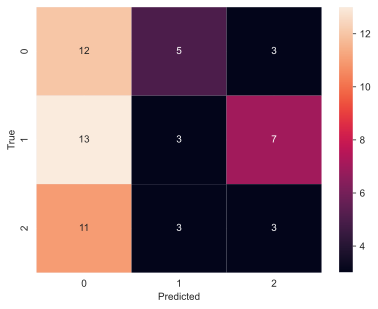

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Split the dataset into a training and a testing set
# Test size of 0.3 means 30% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the logistic regression classifier
logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
